<a href="https://colab.research.google.com/github/sankhapanineog/AI/blob/main/Copy_of_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Centering the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Load data
data = pd.read_csv('preprocessed.csv')

# Step 1: Centering the Data
centered_data, mean = center_data(data)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Add target variable to the transformed data
transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])
transformed_df['Health_Status'] = data['Health_Status']

# Split the data into features and target
X = transformed_df.drop('Health_Status', axis=1)
y = transformed_df['Health_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Vibration and Noise Data')
plt.grid(True)
plt.show()


Explained variance ratio: [9.99969966e-01 3.00338434e-05]


KeyError: 'Health_Status'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Centering the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc1_values, threshold):
    health_status = ['Normal' if pc1 >= threshold else 'Faulty' for pc1 in pc1_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Check if 'Health_Status' column exists
if 'Health_Status' not in data.columns:
    raise KeyError("Target variable 'Health_Status' not found in the dataset.")

# Step 1: Centering the Data
centered_data, mean = center_data(data.drop('Health_Status', axis=1))

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data[:, 0])  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Vibration and Noise Data')
plt.grid(True)
plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


KeyError: "Target variable 'Health_Status' not found in the dataset."

Explained variance ratio: [9.99969966e-01 3.00338434e-05]


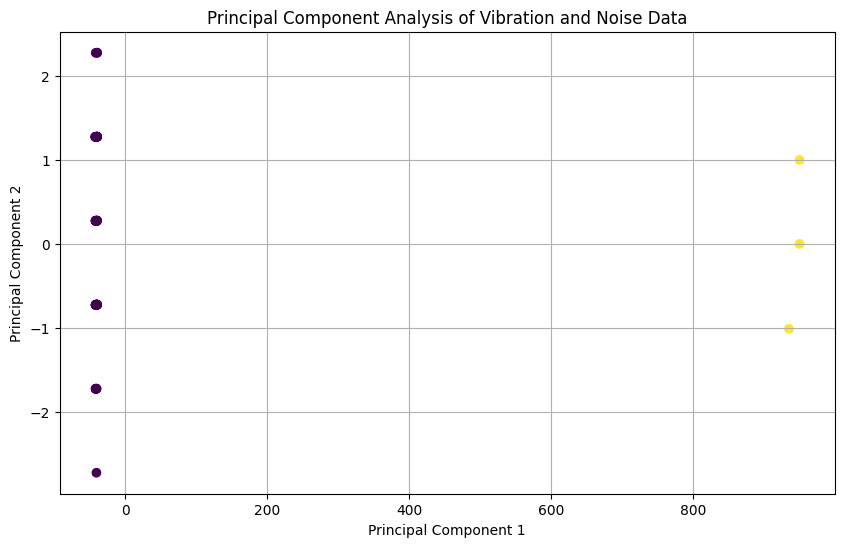

[[15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Centering the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc1_values, threshold):
    health_status = ['Normal' if pc1 >= threshold else 'Faulty' for pc1 in pc1_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Step 1: Centering the Data
centered_data, mean = center_data(data)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data[:, 0])  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Vibration and Noise Data')
plt.grid(True)
plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Centering the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], [0]*len(transformed_data), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['Noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], [0]*len(transformed_data), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y


SyntaxError: incomplete input (<ipython-input-12-c3775c9f7a4e>, line 110)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], [0]*len(transformed_data), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Reshape the transformed data to 2D array
transformed_data_2d = transformed_data.reshape(-1, 1)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data_2d)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data_2d[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2d[:, 0], [0]*len(transformed_data_2d), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data_2d
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('preprocessed.csv')

# Extracting only the 'Noise' column for PCA
noise_data = data[['noise']]

# Step 1: Centering the Data
centered_data, mean = center_data(noise_data)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values.reshape(-1, 1)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 1)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Reshape the transformed data to 2D array
transformed_data_2d = transformed_data.reshape(-1, 1)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data_2d)  # Using mean of PC1 as threshold
data['Predicted_Health_Status'] = classify_health_status(transformed_data_2d[:, 0], threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data_2d[:, 0], [0]*len(transformed_data_2d), c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.title('Principal Component Analysis of Noise Data')
plt.grid(True)

# Plotting the threshold line
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data_2d
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

Explained variance ratio: [9.99969966e-01 3.00338434e-05]


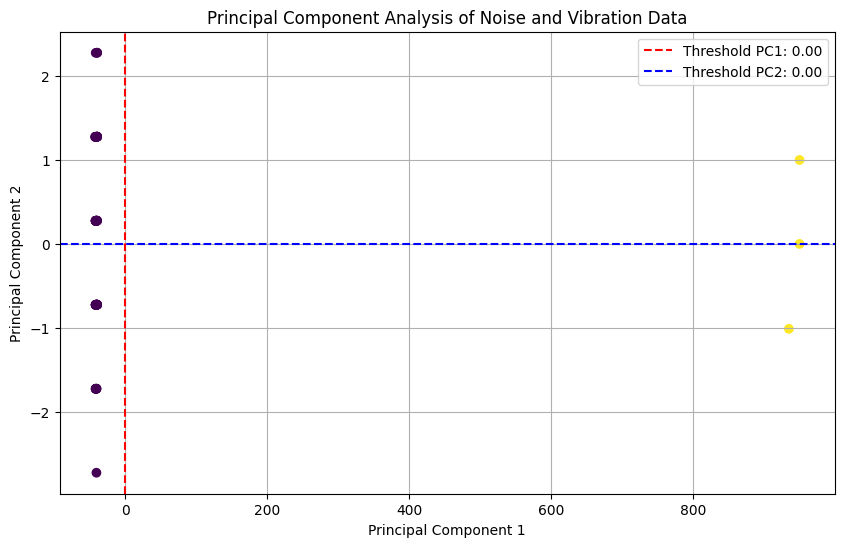

[[15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.cov(centered_data, rowvar=False)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Step 6: Compute Explained Variance
def compute_explained_variance(eigenvalues):
    explained_variance = eigenvalues / np.sum(eigenvalues)
    return explained_variance

# Step 7: Classify Health Status based on Threshold
def classify_health_status(pc_values, threshold):
    health_status = ['Normal' if pc >= threshold else 'Faulty' for pc in pc_values]
    return health_status

# Load data
data = pd.read_csv('1.csv')

# Extracting 'Noise' and 'Vibration' columns for PCA
features = data[['noise', 'vibration']]

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Reshape the centered data to 2D array
centered_data_2d = centered_data.values

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data_2d)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data_2d, principal_components)

# Step 6: Compute Explained Variance
explained_variance = compute_explained_variance(eigenvalues)
print('Explained variance ratio:', explained_variance)

# Step 7: Classify Health Status based on Threshold
threshold = np.mean(transformed_data, axis=0)  # Using mean of PC1 and PC2 as thresholds
data['Predicted_Health_Status'] = classify_health_status(transformed_data[:, 0], threshold[0])

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=pd.factorize(data['Predicted_Health_Status'])[0], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Noise and Vibration Data')
plt.grid(True)

# Plotting the threshold lines
plt.axvline(x=threshold[0], color='r', linestyle='--', label=f'Threshold PC1: {threshold[0]:.2f}')
plt.axhline(y=threshold[1], color='b', linestyle='--', label=f'Threshold PC2: {threshold[1]:.2f}')
plt.legend()

plt.show()

# Split the data into features and target
X = transformed_data
y = pd.factorize(data['Predicted_Health_Status'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Use Logistic Regression for predictive maintenance
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
